## **<span style="color:#003399">Lý thuyết độ đo cho bài toán Phân loại</span>**

### **Ma trận nhầm lẫn (Confusion Matrix):**
- Ma trận nhầm lẫn là ma trận được sử dụng để đánh giá hiệu suất mô hình cho bài toán phân loại. Ma trận nhầm lẫn có dạng:


In [1]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Example data: True labels and Predicted labels
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]  # True values (Actual values)
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1]  # Predicted values

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display Confusion Matrix
print("Confusion Matrix:\n", cm)

# Extract values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

print(f'True Negatives (TN): {TN}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')
print(f'True Positives (TP): {TP}')

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Display the metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Confusion Matrix:
 [[3 1]
 [1 5]]
True Negatives (TN): 3
False Positives (FP): 1
False Negatives (FN): 1
True Positives (TP): 5
Accuracy: 0.80
Precision: 0.83
Recall: 0.83
F1 Score: 0.83


- ``TN`` (âm tính thật): Số trường hợp thuộc nhóm Negative và dự đoán Negative đúng / Số mẫu âm tính thật.
- ``FP`` (dương tính giả): Số trường hợp thuộc nhóm Negative nhưng dự đoán là Positive / Số mẫu dương tính giả.
- ``FN`` (âm tính giả): Số trường hợp thuộc nhóm Positive nhưng được dự đoán là Negative / Số mẫu âm tính giả.
- ``TP`` (dương tính thật) : Số trường hợp thuộc nhóm Positive và được dự đoán Positive đúng / Số mẫu dương tính thật.

### **Có 4 độ đo phổ biến cho bài toán phân loại:**
\
**``Accuracy`` :** $$Accuracy = \frac{(TP + TN)}{All}$$
- Đây là tỉ lệ dự đoán đúng so với tổng số dự đoán. Độ chính xác cho biết mô hình phân loại đúng bao nhiêu phần trăm tổng số trường hợp.
- Khi dữ liệu không cân bằng (số lượng lớp này nhiều hơn lớp kia rất nhiều), độ chính xác có thể gây hiểu nhầm vì mô hình luôn dự đoán lớp chiếm đa số dẫn đến độ chính xác cao nhưng thực tế mô hình hoạt động không tốt.

\
**``Precision`` :** $$Precision = \frac{TP}{(TP + FP)}$$
- Đây là tỉ lệ các trường hợp dự đoán là Positive thực sự đúng. Precision cho biết trong số các dự đoán Positive, có bao nhiêu là đúng.
- Precision cao nghĩa là ít có dự đoán sai khi mô hình dự đoán là Positive. Điều này đặc biệt quan trọng trong các tình huống False Positive (FP) có thể gây vấn đề lớn, chẳng hạn như chuẩn đoán bệnh.

\
**``Recall`` :** $$Recall = \frac{TP}{(TP + FN)}$$
- Đây là tỉ lệ các trường hợp thực sự là Positive được mô hình phát hiện. Recall cho biết trong số các trường hợp Positive có bao nhiêu dự đoán đúng.
- Recall cao nghĩa là ít có các trường hợp Positive được bỏ sót. Điều này đặc biệt quan trọng trong các tình huống mà False Negative (FN) có thể gây vấn đề lớn, chẳng hạn như phát hiện gian lận.

\
**``F1-score`` :** $$F_{1}-score = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} = \frac{TP}{TP + \frac{FN + FP}{2}}$$
- F1-score là trung bình điều hoà (harmonic mean) của Precision và Recall.
- F1-score hữu ích khi bạn cần cân bằng giữa Precision và Recall và đặc biệt hữu ích khi có sự không cân bằng giữa các lớp.

### **Đường cong ROC và diện tích AUC:**
- <u>**Đường cong ROC:**</u>
    - Đường cong ROC (receiver operating characteristic) là một công cụ thông dụng khác được sử
dụng với các bài toán phân loại nhị phân.
    - Trục y là TPR (True Positive Rate/ Recall), trục x là FPR (False Positive Rate).
    - FPR là tỉ lệ các mẫu Negative bị phân loại sai thành Positive, công thức là: $$FPR = \frac{FP}{FP + TN}$$
    - ***Ý nghĩa:***
      - Đường chéo (đường $45^{o}$): từ $(0; 0)$ -> $(1; 1)$ đại diện cho một mô hình phân loại ngẫu nhiên. Một mô hình nằm trên đường cong này cho thấy rằng mô hình không hoạt động tốt hơn dự đoán ngẫu nhiên.
      - Đường cong càng gần góc bên trái $(0; 1)$ thì mô hình phân loại càng tốt.
- <u>**Diện tích AUC (diện tích dưới đường cong ROC):**</u>
  - AUC = 1: Mô hình hoàn hảo, phân loại chính xác các điểm dữ liệu.
  - AUC = 0.5: Mô hình hoạt động không tốt hơn dự đoán ngẫu nhiên.
  - AUC $\leq$ 0.5: Mô hình hoạt động tệ.

Area Under the Curve (AUC): 0.96


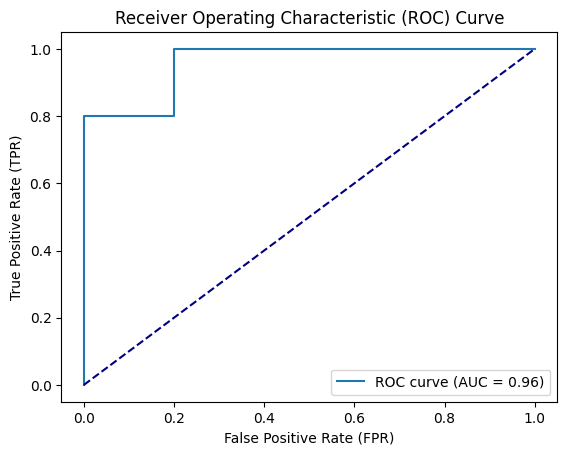

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Example data: True labels and Predicted scores/probabilities
y_true = [0, 0, 1, 1, 0, 1, 0, 0, 1, 1]  # True values (Actual values)
y_scores = [0.1, 0.4, 0.35, 0.8, 0.2, 0.85, 0.15, 0.3, 0.7, 0.9]  # Predicted probabilities

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_true, y_scores)
print(f'Area Under the Curve (AUC): {auc:.2f}')

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
